2024.11.26 12.13
# esercizio dataset wine con scikit-learn 2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


### Carica il dataset Wine
   - Utilizza il modulo datasets di scikit-learn per caricare il dataset Wine.
   


In [4]:
wine = load_wine()


In [14]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'),
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'),
 array(['class_0', 'class_1', 'class_2'], dtype='<U7')]

### Esplora il dataset
   - Visualizza il numero di campioni per ciascuna classe e calcola le statistiche di base delle feature.
   - Visualizzazione: crea un grafico a barre per mostrare la distribuzione delle classi.


In [32]:
# creo un df per il dataset wine dalle feature
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names[:-3])
# ci aggiungo la colonna target "class"
wine_df['class'] = wine.target

# numero di campioni per ciascuna classe
class_counts = wine_df['class'].value_counts()
print("Numero di campioni per ciascuna classe:")
print(class_counts)

# statistiche di base delle feature
print("\n______________\n\n STATISTICHE DI BASE DELLE FEATURES \n______________\n")
wine_df.describe()

Numero di campioni per ciascuna classe:
class
1    71
0    59
2    48
Name: count, dtype: int64

______________

 STATISTICHE DI BASE DELLE FEATURES 
______________



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


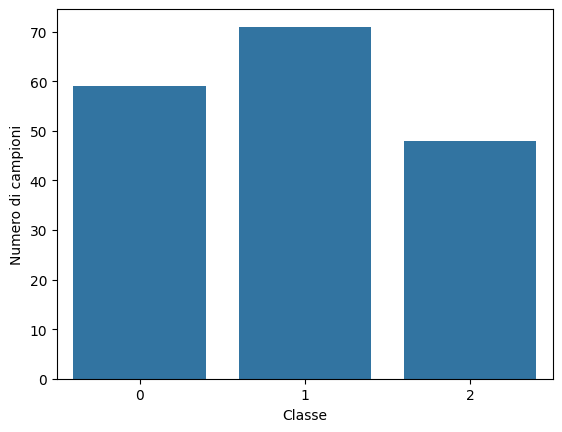

In [ ]:
# creo un grafico a barre per mostrare la distribuzione delle classi

sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Classe")
plt.ylabel("Numero di campioni")
plt.show()


### Riduci la dimensionalità  ***__
   - Applica la PCA (Principal Component Analysis) per ridurre le dimensioni delle feature a 2 componenti
    principali.
   - Visualizzazione: crea un grafico scatter 2D per rappresentare i dati trasformati, con i punti colorati in
    base alla classe.
### Sudddividi i dati in training e test set__
   - Dividi i dati in due set: l'80% per il training e il 20% per il test.


In [34]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
# define X and y from wine
X = wine.data
y = wine.target

# rasforma le feature in una scala standardizzata con standardscaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split dataset into training set and test set 70/30
X_test, X_train, y_test, y_train = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### Applica un algoritmo di classificazione__
   - Utilizza un modello RandomForestClassifier per la classificazione.
### Valuta la performance del modello__
   - Valuta le prestazioni utilizzando le metriche di accuratezza, precisione, recall e F1-score.
### Visualizza l'importanza delle feature / caratteristiche__
   - Visualizza le feature più importanti del dataset Wine secondo il modello Random Forest, utilizzando un
    grafico a barre.
### Visualizza la matrice di confusione__
   - Genera e visualizza la matrice di confusione per valutare la qualità della classificazione.
   - Visualizzazione: utilizza una heatmap per rappresentare la matrice di confusione in modo più chiaro.
### Ottimizza l'algoritmo__
   - Utilizza la GridSearchCV per ottimizzare i parametri del Random Forest (ad esempio: numero di estimatori e
    profondità massima dell'albero).



